### 인공 신경망 코드 실습

+ 사용자 정의 함수 

def 함수명(매개변수1,매개변수2):

    함수 기능 코드
    return 함수 반환 결과값
  
위와 같은 구조로, 파이썬에선 함수를 생성 및 자유롭게 호출해서 사용할 수 있다.

 

In [1]:
# 사용자 정의 함수 예시
def plus(x1,x2):
    sum = x1+x2
    return sum
print(plus(2,3))

5


### 단층 퍼셉트론 구현

In [2]:
import numpy as np # 라이브러리 호출
def NAND(x1,x2): # Not AND 게이트 구현
    x = np.array([x1,x2])       # 입력층
    w = np.array([-0.5,-0.5])  # 가중치 배열
    b = 0.7                    # 편향
    tmp = np.sum(w*x) + b     # 계단 함수(wx+b>=0 이면 1 아니면 0)
    if tmp>=0:
        return 1
    else :
        return 0

def OR(x1,x2): # OR 게이트 구현
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x)+b
    if tmp>=0 :
        return 1
    else :
        return 0

In [3]:
print(NAND(0,1),NAND(1,0),NAND(1,1),NAND(0,0),"\n") # "\n"은 한줄 띄어쓰는 기능
print(OR(0,1),OR(1,0),OR(1,1),OR(0,0))            

1 1 0 1 

1 1 1 0


### 다층 퍼셉트론 (XOR게이트)

In [4]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -1
    tmp = np.sum(w*x) + b
    if tmp>=0:
        return 1
    else:
        return 0

In [5]:
def XOR(x1,x2):
    nand_perceptron = NAND(x1,x2) # 앞선 층인 NAND 퍼셉트론의 연산 결과
    or_perceptron = OR(x1,x2)     # 앞선 층인 OR 퍼셉트론의 연산 결과
    y = AND(nand_perceptron,or_perceptron) # 두 가지의 AND 연산 
    return y # 

In [6]:
XOR(0,1),XOR(1,0),XOR(0,0),XOR(1,1)

(1, 1, 0, 0)

### 퍼셉트론 훈련 및 예측

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,[2,3]] # Petal_length, Petal_width
y = (iris.target==0).astype(np.int) # .astype으로 데이터형을 numpy int로 바꾼다.

per_clf = Perceptron(max_iter=100, random_state=42) # 퍼셉트론 분류기 생성
per_clf.fit(X,y) # iris 데이터 전체 훈련

y_pred = per_clf.predict([[2, 0.5]])

In [8]:
y_pred # 꽃잎 길이와 너비 2, 0.5에 대하여 종(target)을 Setosa(Species==0은 True)로 예측했다.

array([1])

In [20]:
print("퍼셉트론 각 열들의(꽃잎 변수) 가중치 계수 : ",per_clf.coef_)
print("퍼셉트론 결정 경계의 절편 : ",per_clf.intercept_)

퍼셉트론 각 열들의(꽃잎 변수) 가중치 계수 :  [[-1.4 -2.2]]
퍼셉트론 결정 경계의 절편 :  [4.]


####  Numpy meshgrid, linspace함수
+ linspace(start, end, number) :
 start숫자 부터 end숫자까지 number의 수만큼 숫자를 등간격으로 형성한다. 

+ meshgrid(x1,x2) -> return y1, y2 :
 직교 좌표계(grid space)를 만들기 위한 grid point들을 받아서 자동으로 해당 점들을 형성해준다.

In [15]:
# 결과 그래프를 위한 시각화 변수 정의

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1] # 결정 경계 
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# 직교 좌표계 만들기
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1), # 0부터 5사이 등간격으로 500x1 배열
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1), # 0부터 2사이 등간격으로 200x1 배열
    )

X_new = np.c_[x0.ravel(), x1.ravel()] # ravel() : (m,n)데이터를 (n,1)형태로 평탄히 만든다(1줄)
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

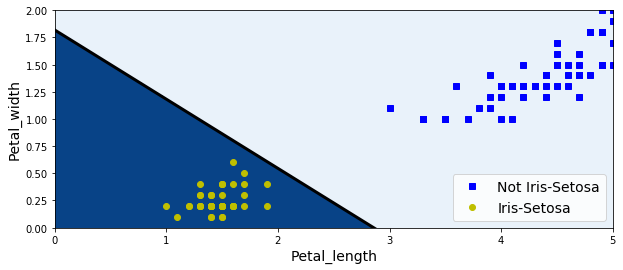

In [23]:
# 퍼셉트론 분류 결과 시각화

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 4)) # 그래프 크기 설정
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa") # "bs" -파란 사각형모양 
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa") # "yo" -노란 원모양

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3) # 결정경계(직선) "k-"=검은색

plt.contourf(x0, x1, zz, cmap='Blues') # contourf = 등고선을 그려줌. cmap = 사용할 컬러 팔레트(색깔 조합판)
plt.xlabel("Petal_length", fontsize=14) 
plt.ylabel("Petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14) # 그래프 범례 표시
plt.axis(axes)

plt.show()